In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x_train=np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train=np.array([460,232,178])
print('x_train:\n',x_train)
print('y_train:\n',y_train)

x_train:
 [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y_train:
 [460 232 178]


In [11]:
print(f'The shape of the array x_train:{x_train.shape}, X Type {type(x_train)}')
print(x_train)
print(f'The shape of the array x_train:{y_train.shape}, Y Type {type(y_train)}')
print(y_train)

The shape of the array x_train:(3, 4), X Type <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
The shape of the array x_train:(3,), Y Type <class 'numpy.ndarray'>
[460 232 178]


In [18]:
b_init = 785.1811367994083
w_init = np.random.randn(4)
print(w_init)
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

[ 0.00429143 -0.17460021  0.43302619  1.20303737]
w_init shape: (4,), b_init type: <class 'float'>


In [20]:
def predict_single_loop(x,w,b):
    sum=0
    for i in range(len(x)):
        sum=sum+x[i]*w[i]
    sum=sum+b
    return sum

In [22]:
x_vect = x_train[0,:]
x_vect

array([2104,    5,    1,   45])

In [23]:
predict_single_loop(x_vect,w_init,b_init)

847.9070144431525

In [24]:
#dot product
def predict(x,w,b):
    p=np.dot(x,w)+b
    return p


In [25]:
predict(x_vect,w_init,b_init)

847.9070144431525

In [31]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost
        

In [32]:
compute_cost(x_train,y_train,w_init,b_init)

157707.05679261798

In [72]:
#calculate gradient
def compute_gradient(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    print('dj_dw:',dj_dw)
    dj_db=0
    print('dj_db:',dj_db)
    for i in range(m):
        err = (np.dot(x[i],w)+b)-y[i]
        print(f'error:{i}',err)
        for j in range(n):
            dj_dw[j] = dj_dw[j]+err*x[i,j]
            print('dj_dw_loop:',dj_dw)
        print('dj_dw:',dj_dw)
        dj_db=dj_db+err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    print('dj_dw:',dj_dw)
    print('dj_db:',dj_db)
    return dj_db,dj_dw
    
    

In [73]:
dj_db,dj_dw = compute_gradient(x_train,y_train,w_init,b_init)

dj_dw: [0. 0. 0. 0.]
dj_db: 0
error:0 387.90701444315255
dj_dw_loop: [816156.35838839      0.              0.              0.        ]
dj_dw_loop: [816156.35838839   1939.53507222      0.              0.        ]
dj_dw_loop: [8.16156358e+05 1.93953507e+03 3.87907014e+02 0.00000000e+00]
dj_dw_loop: [8.16156358e+05 1.93953507e+03 3.87907014e+02 1.74558156e+04]
dj_dw: [8.16156358e+05 1.93953507e+03 3.87907014e+02 1.74558156e+04]
error:1 607.7215497026161
dj_dw_loop: [1.67669007e+06 1.93953507e+03 3.87907014e+02 1.74558156e+04]
dj_dw_loop: [1.67669007e+06 3.76269972e+03 3.87907014e+02 1.74558156e+04]
dj_dw_loop: [1.67669007e+06 3.76269972e+03 1.60335011e+03 1.74558156e+04]
dj_dw_loop: [1.67669007e+06 3.76269972e+03 1.60335011e+03 4.17646776e+04]
dj_dw: [1.67669007e+06 3.76269972e+03 1.60335011e+03 4.17646776e+04]
error:2 653.0275698073997
dj_dw_loop: [2.23306956e+06 3.76269972e+03 1.60335011e+03 4.17646776e+04]
dj_dw_loop: [2.23306956e+06 5.06875486e+03 1.60335011e+03 4.17646776e+04]
dj_dw

In [81]:
import copy,math
J_hist = []
# w=w.deepcopy(w_init)
b=b_init
iterations = 1000
alpha = 5.0e-7
for i in range(iterations):
    w=w_init-alpha*dj_dw
    b=b_init-alpha*dj_db
print(w)
print(b)
if i < 1000:
    J_History.append(compute_cost(x_train,y_train,w_init,b_init))

if i%math.ceil(iterations/10)==0:
    print(f'Iterations{i:4d}: Cost {J_hist[-1]:8.2f}')


[-0.36788683 -0.175445    0.43265013  1.19226727]
785.1808620233859


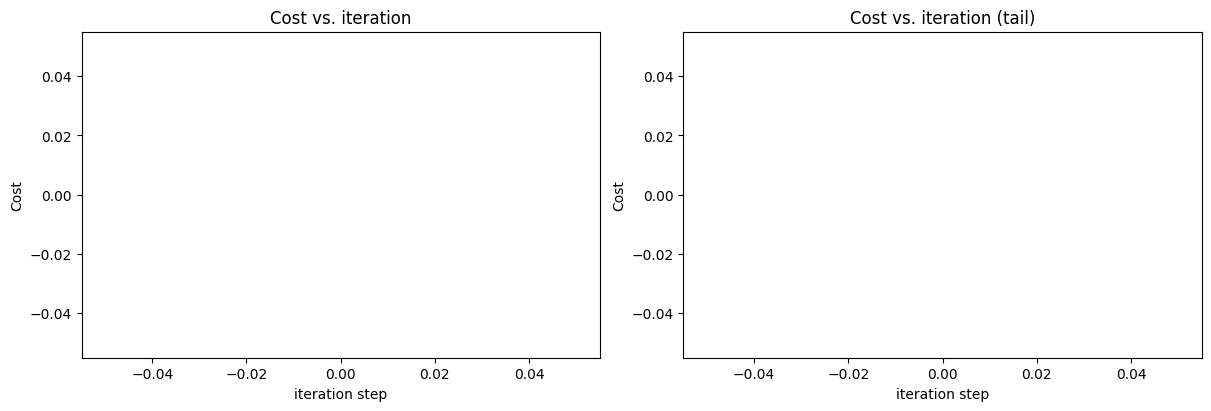

In [82]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()